In [47]:
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import math, sys, os

## K Minimum Value estimator for Approximate distinct Values

K Miminum Value Distinct Value Estimation works by assuming that you can design a hash function that will spread your data *uniformly* across a closed interval [0,1].  If this is so, we can estimate the average spacing between each of our hashed datapoints with the first order statistic S<sub>1</sub>, by DV_hat = 1 / S<sub>1</sub>.

In [48]:
from random import random as rand

class MVEstimator:
    
    def __init__(self):
        self.min_value = None
    
    def update(self,v):
        if self.min_value == None:
            self.min_value = v
        else:
            self.min_value = min(self.min_value,v)
    
    def estimate_DV(self):
        return 1 / self.min_value


MV = MVEstimator()
for i in range(10000):
    MV.update(rand())

print MV.estimate_DV()

2381.74164606


Now, since this estimator is derived from a single value, S<sub>1</sub>, the variance of this estimator is going to be equal to the variance of S<sub>1</sub>.  A straitforward way to reduce variance of this estimator is to change from using S<sub>1</sub>, to using S<sub>k</sub>, the k-th order statistic.  

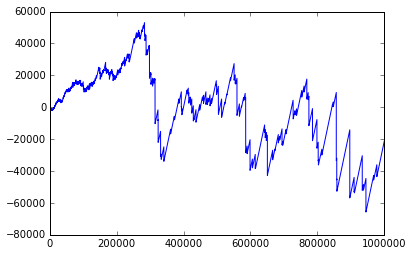

In [60]:
import heapq
import pandas as pd

class KMV:
    
    def __init__(self, k):
        self._heap = []
        self._count = 0
        self.k = k
    
    def show(self):
        return sorted([-1 * x for x in self._heap])
        
    def total_seen(self):
        return self.__count
    
    def size(self):
        return len(self._heap)
    
    def __heappush(self, v):
        """
        storing the values as negatives, to make a max-heap
        """
        heapq.heappush(self._heap, v)
        self._count += 1
        
    def __heappop(self):
        return -1 * heapq.heappop(self._heap)
    
    def kth_smallest(self):
        return -1 * self._heap[0]
    
    def update(self, v):
        if self.size() < self.k:
            self.__heappush(-1 * v)
        elif v < self.kth_smallest():
            self.__heappop()
            self.__heappush(-1 * v)
    
    def estimate_DV(self):
        if self._count < self.k:
            return self._count
        else:
            return (self.k - 1) / self.kth_smallest()


kmv = KMV(100)
DV_error = []
samples = list(range(1000000))
for i in samples:
    kmv.update(rand())
    DV_error.append(i - kmv.estimate_DV())

    
DV_error = pd.Series(DV_error)
DV_error.plot()

## Multi-sets